# SPOTIFY DATA ANALYSIS AND RECOMMENDATION SYSTEM 
Authors: Alex Qian, Dmitry Shlykov,  Patrick Scerri, Jason Chin, Joe Diaz, Porfirio Mohabir

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix
import functools
from sys import exit

# FUNCTION DEFINITIONS

In [ ]:
def five_year_valence(file):
    
    print("COVID-19 affecting valence (Happiness factor) of music releases? Specify release years, code to make bars that are not max value greyed out. Annotate bars with value")
    
    
    df = pd.read_csv(file)

    df = df.drop(df[df['year'] < 2016].index)

    val = df['valence']

    plt.figure(figsize = (16, 10)) 
    clrs = ['grey' if (x < max(val)) else 'dodgerblue' for x in val ]

    plot = sns.barplot(x = "year", 
        y = "valence",
        palette = clrs,
        data = df) 
    
    plt.title("Spotify Track Average Valence by Year", fontsize = 20, fontweight = "bold") 
    plt.ylabel("Average Valence", fontsize = 20 ) 
    plt.xlabel("Year", fontsize = 20 )

    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.3f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 10), 
                      textcoords = 'offset points')
        



In [ ]:
def valence_track_popularity(file):
    print("Are popular songs, generally happier songs?")
    print("Filter, get 'Year' into a seperate column, plot with an axis")
    
    df = pd.read_csv(file)

    df['release_date'] = pd.to_datetime(df['release_date'])
    df['year'], df['month'] = df['release_date'].dt.year, df['release_date'].dt.month

    df = df.loc[(df['year'] == 2020)]
    print(df[["valence"]].mean())

    hundred = df.sort_values(['popularity'], ascending=False).head(100)
    print(hundred[["valence"]].mean())

    plt.title("2020 Valence for Top 100 Tracks", fontsize = 16, fontweight = "bold")

    plots = sns.scatterplot(
            data = hundred,
            x = "popularity",
            y = "valence",
            color="green")

    plots.axhline(0.501)        
    
    

In [ ]:
def rec_program(file):
    df = pd.read_csv(file)
    df.groupby(["artists"])

    #################

    # Clean Artist
    df['artists'] = df['artists'].map(lambda x: x.lstrip('[').rstrip(']'))

    # Make Data Table Pretty
    def left_justified(df):
        formatters = {}
        for li in list(df.columns):
            max = df[li].str.len().max()
            form = "{{:<{}s}}".format(max)
            formatters[li] = functools.partial(str.format, form)
        return df.to_string(formatters=formatters, index=False)

    pd.set_option('colheader_justify', 'center')
    df.rename(columns={'name': 'SONG NAME', 'artists': 'ARTIST NAME'}, inplace=True)


    #################

    # Clean Rows
    df['acousticness'] = df['acousticness'].apply(lambda x: x*10)
    df['danceability'] = df['danceability'].apply(lambda x: x*10)
    df['energy'] = df['energy'].apply(lambda x: x*10)
    df['instrumentalness'] = df['instrumentalness'].apply(lambda x: x*10)
    df['liveness'] = df['liveness'].apply(lambda x: x*10)
    df['speechiness'] = df['speechiness'].apply(lambda x: x*10)
    df['valence'] = df['valence'].apply(lambda x: x*10)

    #################

    # User Menu
    print("\nMusic Recommendation Software")
    print("=============================")
    print("1 - Acousticness")
    print("2 - Danceability")
    print("3 - Energy")
    print("4 - Instrumentalness")
    print("5 - Liveness")
    print("6 - Speechiness")
    print("7 - Valence")

    #################

    # User Choice
    choice = int(input("Please select a song characteristic to search by: "))

    if choice == 1:
        acou = int(input("How 'acoustic' would you like your song to be (0-10): "))
        c = df[(df.acousticness == acou)]
    elif choice == 2:
        danc = int(input("How 'danceble' would you like your song to be (0-10): "))
        c = df[(df.danceability == danc)]
    elif choice == 3:
        ener = int(input("How much 'energy' would you like your song to have (0-10): "))
        c = df[(df.energy == ener)]
    elif choice == 4:
        inst = int(input("How much 'instrumentalness' would you like your song to have (0-10): "))
        c = df[(df.instrumentalness == inst)]
    elif choice == 5:
        live = int(input("How much 'liveness' would you like your song to have (0-10): "))
        c = df[(df.liveness == live)]
    elif choice == 6:
        spee = int(input("How much 'speechiness' would you like your song to have (0-10): "))
        c = df[(df.speechiness == spee)]
    elif choice == 7:
        vale = int(input("How much 'valence' would you like your song to have (0-10): "))
        c = df[(df.valence == vale)]
    else:
        print("\nSorry, that is not a valid input.")
        exit()

    #################

    # Find matching songs
    hm = input("How many results would you like to see: ")

    qq = c.sort_values("popularity", ascending=False)
    ms = qq[["SONG NAME", "ARTIST NAME"]]
    t = ms.head(int(hm))
    print("")

    if len(t) > 0:
        print(left_justified(t))
    else:
        print("No results found – please try again.")
        


In [ ]:
def song_stats(file):
    pd.set_option('display.max_columns', None)

    #read the data file into a panda dataframe

    df = pd.read_csv(file)
    another = "y"
    
    while another=="y":
        
        song = input("What song would you like to see the stats of? ")
        
        # filter for just the song name, the input needs to be done carefully
        
        df_song=df[df["name"]==song][["artists","acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]
        
        # put results out of 10 instead of decimals
        
        for i in ["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]:
            df_song[i]=df_song[i]*10
            
        print(df_song)
        
        another = input("Would you like to search another song? (y/n)")
        
        # error check
        
        while another != "y" and another != "n":
            
            print("INVALID INPUT, TRY AGAIN")
            another = input("Would you like to search another song? (y/n)")
        
     

In [ ]:
def song_pref(file):
    pd.set_option('display.max_columns', None)

    #read the data file into a panda dataframe

    df = pd.read_csv(file)
    acousticness_sel = float(input("How much acousticness would you like? (0-10) "))
    danceability_sel = float(input("How much danceability would you like? (0-10) "))
    energy_sel = float(input("How much energy would you like? (0-10) "))
    instrumentalness_sel = float(input("How much instrumentalness would you like? (0-10) "))
    liveness_sel = float(input("How much liveliness would you like? (0-10) "))
    speechiness_sel = float(input("How much speechiness would you like? (0-10) "))
    valence_sel = float(input("How much valence would you like? (0-10) \n"))
    
    # straight calcuations, adding columns to df
    
    df["Length of vector"] = (df["acousticness"]**2+df["danceability"]**2+df["energy"]**2+df["instrumentalness"]**2+df["liveness"]**2+df["speechiness"]**2+df["valence"]**2)**.5
    df["Length of selection"] = (acousticness_sel**2+danceability_sel**2+energy_sel**2+instrumentalness_sel**2+liveness_sel**2+speechiness_sel**2+valence_sel**2)**.5
    df["Dot Product"] = df["acousticness"]*acousticness_sel+df["danceability"]*danceability_sel+df["energy"]*energy_sel+df["instrumentalness"]*instrumentalness_sel+df["liveness"]*liveness_sel+df["speechiness"]*speechiness_sel+df["valence"]*valence_sel
    
    # this is the important last column of calculations, we want the highest number here
    
    df["Cosine"] = df["Dot Product"]/df["Length of vector"]/df["Length of selection"]
    
    # print top 5 - maybe take these top 5 and take whatever joe finds in his method and print those as all our recs?
    
    print(df.sort_values(by="Cosine",ascending=False)[["artists","name"]].head(5))
    

In [ ]:
def accoustic_energy(file):
    df = pd.read_csv(file)
    averages = df[["acousticness","popularity","key","instrumentalness", "liveness","tempo","danceability","energy","valence", "loudness", "speechiness", "year"]].groupby("year").mean().sort_values(by="year").reset_index()
    
    columns = ["acousticness","energy"]

    for c in columns:
        axis = sns.lineplot(x='year', y=c, data=averages)
    plt.ylabel("value")
    plt.legend(columns)

    print("There are a number of key insights we got from the dataset, one of which is that acousticness and energy \
    are almost  mirror images of eachother, especially after 1950. This indicates that they are these two categories \
    are negatively  correlated. The energy of a song can therefore help us determine its energy and visa-versa, which \
    useful in prediction models.")
    plt.show()

In [ ]:
def avg_key_overtime(file):
    df = pd.read_csv(file)
    averages = df[["acousticness","popularity","key","instrumentalness", "liveness","tempo","danceability","energy","valence", "loudness", "speechiness", "year"]].groupby("year").mean().sort_values(by="year").reset_index()
    
    x = averages.year
    y = averages.key
    plt.plot(x,y)
    m, b = np.polyfit(x, y, 1)
    plt.title("Average Key Through The Years")
    plt.plot(x, m*x + b)

    print("Plotting the average key through the years, along with a linear regression shows us that the average key \
    has increased only slightly but staying close to between the Key of E and the Key of F. It seems the key in which \
    songs are created are, on average, relatively consistent in the past 100 years.")
    plt.show()

In [ ]:
def correlation_matrix(file):
    data = pd.read_csv(file)
    
    print("Let's create correlation and HEAT MAP where we need only numerical features")
    data1 = data.drop(['artists', 'id', 'name', 'release_date'], axis=1)
  
    # for better analysis, let's visualize a correlation matrix with a heatmap
    # r < 0.25 No relationship; 0.25 < r < 0.5 Weak; 0.5 < r < 0.75 Moderate; r > 0.75 Strong

    # We see some correlations here: 
    # loudness & energy 0.78 - strong positive relationship; the more energy the more loud music
    # valence & danceability 0.54 - moderate relationship; the more positive music the more danceable it is
    # energy & year 0.54 - moderate positive relationship; apparently some years produce more energetic music
    # acousticness & energy -0.75 - strong negative relationship; the more energy the less acoustics

    # for popularity music should be more energetic (0.33) and loud (0.34), less acoustic (-0.4) and instrumental (-0.3)

    plt.figure(figsize=(16, 8))
    sns.set(style="whitegrid")
    corr1 = data1.corr()
    sns.heatmap(corr1,annot=True,cmap="coolwarm")
    

In [ ]:
def valence_track_liner_regression(file):
    df = pd.read_csv(file)
    
    print("Analyzing the Valence or \'musical positiveness conveyed by a track\' can be very revealing regarding \
    whether music reflects society's mood. By analyzing the average Valence post-2000 we can see a sharp decrease \
    right around the period of the global recession in 2008. This indicates that there may be some correlation between \
    musical \'happiness\' and the general mood of society at large.")


    ff = df[df.year > 2000].reset_index()
    ff = ff.groupby('year')["valence"].mean().reset_index()
    sns.lineplot(x='year', y='valence', data=ff)
    plt.title("Average Valence 2000-2020")
    plt.xlabel('Year')
    plt.ylabel('Valence')
    plt.show()
     

In [ ]:
def features_distrib(file):
    
    print("Features Distribution")
    data = pd.read_csv(file)
    
    numerical_col = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 
                 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence',
                 'year']

    fig, axes = plt.subplots(4, 4, figsize=(18, 16))
    fig.suptitle('Spotify histogram')

    i=0;
    j=0;

    for key in numerical_col:
        sns.histplot(data=data[key],ax=axes[i,j])
        if(j<3):
            j=j+1
        elif(j==3):
            j=0;
            i=i+1

In [ ]:
def popularity_distrib(file):
    print("Popularity Distibution vs Density")
    data = pd.read_csv(file)
    # popularity is unevenly distributed with many songs near 0.0 with other spread to 75
    plt.figure(figsize=(10, 6))
    sns.distplot(data.popularity,bins=30) 

In [319]:
def positioning_scatterplots(file):
    
    print("Feature Positioning Scatterplot")
    data = pd.read_csv(file)
    
    # let's drop objects columns to create correlation and other visualizations where we need only numerical features
    data1 = data.drop(['artists', 'id', 'name', 'release_date'], axis=1)
      
    # let's also look at positioning data in scatterplots
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    cols = ["valence","popularity","acousticness","energy","speechiness","danceability" ]
    sns.pairplot(data1[cols], height = 2.5 )
    plt.show()

In [ ]:
def popularity_unpopularity(file):
    data = pd.read_csv(file)
    
    # let's drop objects columns to create correlation and other visualizations where we need only numerical features
    data1 = data.drop(['artists', 'id', 'name', 'release_date'], axis=1)
    
    # creating a target/label dimension possible for supervised learning models 
    # to turn into binary we arbitrary set a threshold of 64 for "popularity" dimension

    pop2 = data1.popularity
    pop4 = []

    for pop in pop2:
        if pop >= 56:
            pop4.append(1)
        else:
            pop4.append(0)
            
            
    data1["target"] = pop4
    
    # let's look at some differences between popular and unpopular music

    # the features most correlated with popularity:
    # median in acousticness is about 0.15 for popular and 0.6 for unpopular music
    # median in danceability is about close to 6.1 for popular and 0.53 for unpopular music, with some outliers
    # median in energy is about 0.68 for popular and 0.45 unpopular music


    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15,5))
    data1.boxplot(column = 'acousticness', by = 'target', ax = axes[0])
    data1.boxplot(column = 'danceability', by = 'target', ax = axes[1])
    data1.boxplot(column = 'energy', by = 'target', ax = axes[2])
    data1.boxplot(column = 'instrumentalness', by = 'target', ax = axes[3])
    data1.boxplot(column = 'liveness', by = 'target', ax = axes[4])
    data1.boxplot(column = 'valence', by = 'target', ax = axes[5])
    data1.boxplot(column = 'speechiness', by = 'target', ax = axes[6])

    for ax in axes:
        ax.set_xlabel('TARGET')

    plt.suptitle('')
    plt.tight_layout()
    plt.show() 
    
   

In [ ]:
def popularity_KDE(file):
    data = pd.read_csv(file)
    
    # let's drop objects columns to create correlation and other visualizations where we need only numerical features
    data1 = data.drop(['artists', 'id', 'name', 'release_date'], axis=1)
    
    # creating a target/label dimension possible for supervised learning models 
    # to turn into binary we arbitrary set a threshold of 64 for "popularity" dimension

    pop2 = data1.popularity
    pop4 = []

    for pop in pop2:
        if pop >= 56:
            pop4.append(1)
        else:
            pop4.append(0)
            
            
    data1["target"] = pop4
    
    
    plt.figure(figsize = (9, 6))
    sns.kdeplot(data = data1.loc[data1['popularity'] >= 56, 'year'], label = 'not popular', legend=True)
    sns.kdeplot(data = data1.loc[data1['popularity'] < 56, 'year'], label = 'popular', legend=True)
    # Labeling of plot
    plt.xlabel('Year'); plt.ylabel('Density (KDE)'); plt.title('Popular (blue) Unpopular (orange) music distribution / Years')
    plt.show()
    
    
    # use kernel density estimation plot (KDE) to visualize popularity (in this case we use 'target') and other features 
    # https://en.wikipedia.org/wiki/Kernel_density_estimation

    # density generally is even except some shifts in acousticness, danceability, energy which confirms our previous findings

    plt.figure(figsize = (10, 18))

    # iterate through the sources
    for i, source in enumerate(["acousticness","danceability","energy", 
             "instrumentalness", "liveness", "valence", "speechiness"]):

        # create a new subplot for each source
        plt.subplot(7, 1, i + 1)

        # plot 1
        sns.kdeplot(data1.loc[data1['target'] == 1, source], label = 'target == 1')
        # plot 0
        sns.kdeplot(data1.loc[data1['target'] == 0, source], label = 'target == 0')

        # Label the plots
        plt.title('Popular (blue) Unpopular (orange) distribution of %s by Target' % source)
        plt.xlabel('%s' % source); plt.ylabel('Density (KDE)');

    plt.tight_layout(h_pad = 2.5)
    plt.show()

In [ ]:
def top_songs_cumm_popularity(file):
    
    print("Top 10 songs ranked by cumulative popularity")
    
    data = pd.read_csv(file)
    # let's look top 10 popular artist, in this case a sum (cumulative value) of popularity of their songs

    # As we see, over the years the most popular artists are The Beatles, Frank Sinatra, Elvis Presley.
    # Assuming that Fleetwood Mac was widely popular in 1970s, not recently

    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")
    x = data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
    ax = sns.barplot(x.index, x, color='lightblue')
    ax.set_title('Top 10 artists (with cumulative popularity)')
    ax.set_ylabel('Popularity')
    ax.set_xlabel('Artists')
    plt.xticks(rotation = 90)

In [ ]:
def top_ten_popularity(file):

    print("Top 10 songs ranked by popularity")
    data = pd.read_csv(file)
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")
    x = data.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
    ax = sns.barplot(x.index, x, color='lightgreen')
    ax.set_title('Top 10 tracks')
    ax.set_ylabel('Popularity')
    ax.set_xlabel('Tracks')
    plt.xticks(rotation = 90)

In [ ]:
def execute_rec_system():
    print("Welcome to our Recommendation Sytem. Please choose the following:\n")
    print("===========================================================================\n")    

    flag = 'y'

    #error check
    while(flag == 'y'):

        print("[1] Recommendation by feature")
        print("[2] Recommendation Top 5 songs based on multiple preferences")
        print("[3] Look up a song statistics")
        selection = input("Please select an options:[1],[2] or [3]:")

        while((selection != '1' and selection != '2') and (selection != '3')):
            print("INVALID INPUT, TRY AGAIN")
            selection = input("Please select an options:[1],[2] or [3]:")

        if(selection == '1'):
            rec_program('data.csv')
        if(selection == '2'):
            song_pref("data.csv")
        if(selection == '3'):
            song_stats("data.csv")

        flag = input("Would you like to restart the recommendation systems [y/n]:")

        #error check
        while(flag != "y" and flag != "n"):
            print("INVALID INPUT, TRY AGAIN")
            flag = input("Would you like to restart the recommendation systems [y/n]:")
        print("\n")

    print("===========================================================================\n")    
    print("Recommendation Program End")

# SPOTIFY DATA ANALYSIS
Datasets Used: data.csv, tracks.csv, data_by_year_o.csv <br/>
Link --> https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=tracks.csv

There are a number of key insights we got from the dataset, one of which is that acousticness and energy     are almost  mirror images of eachother, especially after 1950. This indicates that they are these two categories     are negatively  correlated. The energy of a song can therefore help us determine its energy and visa-versa, which     useful in prediction models.


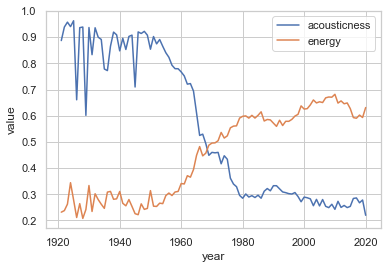

In [310]:
accoustic_energy('data.csv')

Plotting the average key through the years, along with a linear regression shows us that the average key     has increased only slightly but staying close to between the Key of E and the Key of F. It seems the key in which     songs are created are, on average, relatively consistent in the past 100 years.


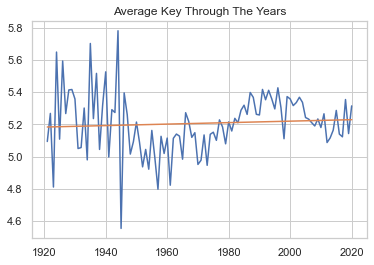

In [311]:
avg_key_overtime('data.csv')

Analyzing the Valence or 'musical positiveness conveyed by a track' can be very revealing regarding     whether music reflects society's mood. By analyzing the average Valence post-2000 we can see a sharp decrease     right around the period of the global recession in 2008. This indicates that there may be some correlation between     musical 'happiness' and the general mood of society at large.


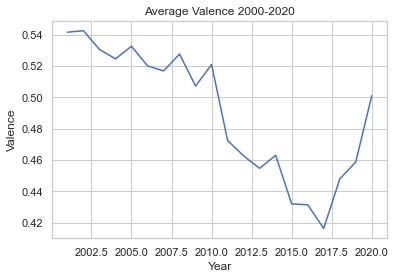

In [312]:
valence_track_liner_regression('data.csv')

COVID-19 affecting valence (Happiness factor) of music releases? Specify release years, code to make bars that are not max value greyed out. Annotate bars with value


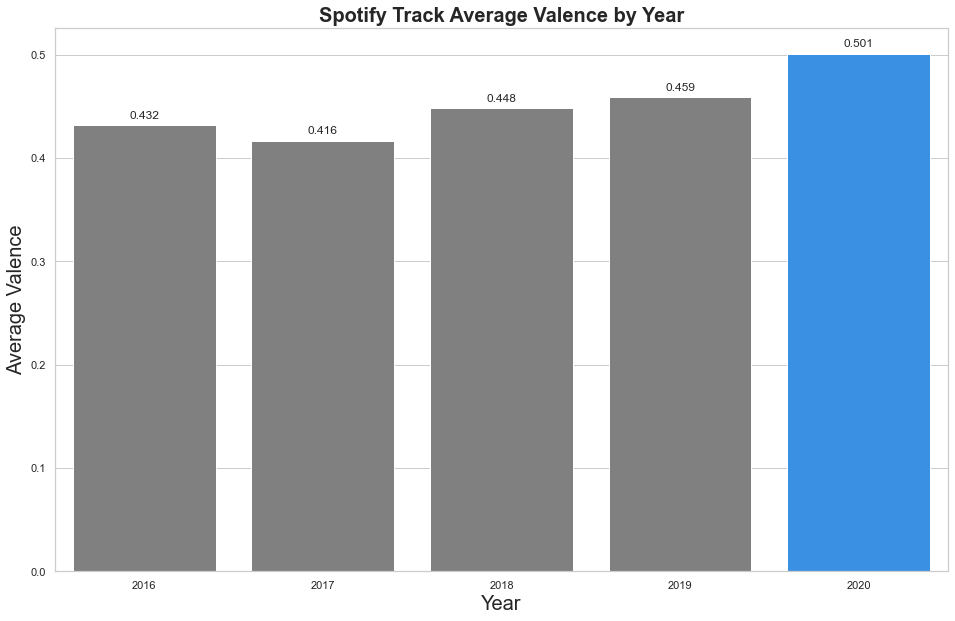

In [313]:
five_year_valence('data_by_year_o.csv')

Are popular songs, generally happier songs?
Filter, get 'Year' into a seperate column, plot with an axis
valence    0.501712
dtype: float64
valence    0.558864
dtype: float64


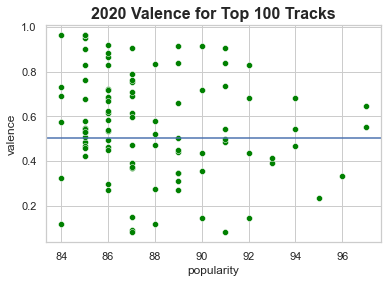

In [314]:
valence_track_popularity('spotify_tracks.csv')

Let's create correlation and HEAT MAP where we need only numerical features


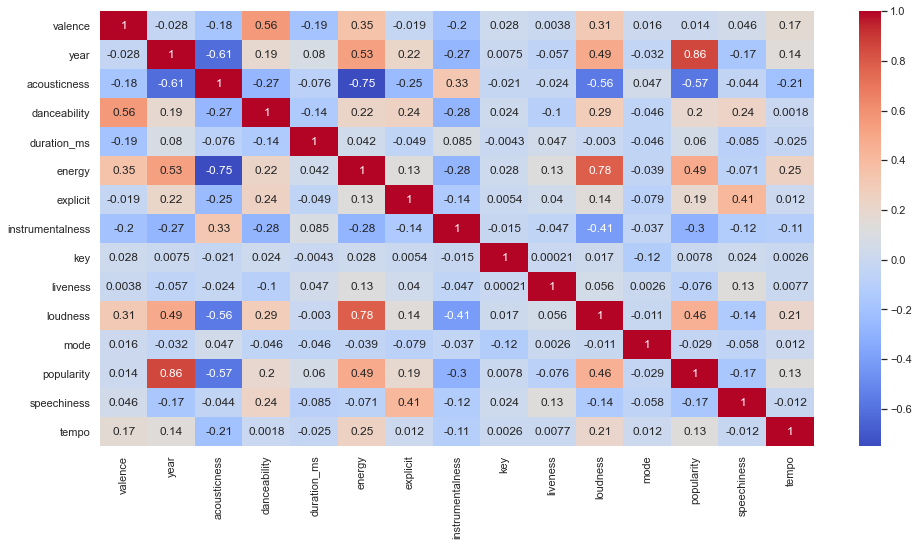

In [315]:
# for better analysis, let's visualize a correlation matrix with a heatmap
# r < 0.25 No relationship; 0.25 < r < 0.5 Weak; 0.5 < r < 0.75 Moderate; r > 0.75 Strong

# We see some correlations here: 
# loudness & energy 0.78 - strong positive relationship; the more energy the more loud music
# valence & danceability 0.54 - moderate relationship; the more positive music the more danceable it is
# energy & year 0.54 - moderate positive relationship; apparently some years produce more energetic music
# acousticness & energy -0.75 - strong negative relationship; the more energy the less acoustics

# for popularity music should be more energetic (0.33) and loud (0.34), less acoustic (-0.4) and instrumental (-0.3)
correlation_matrix('data.csv')

Features Distribution


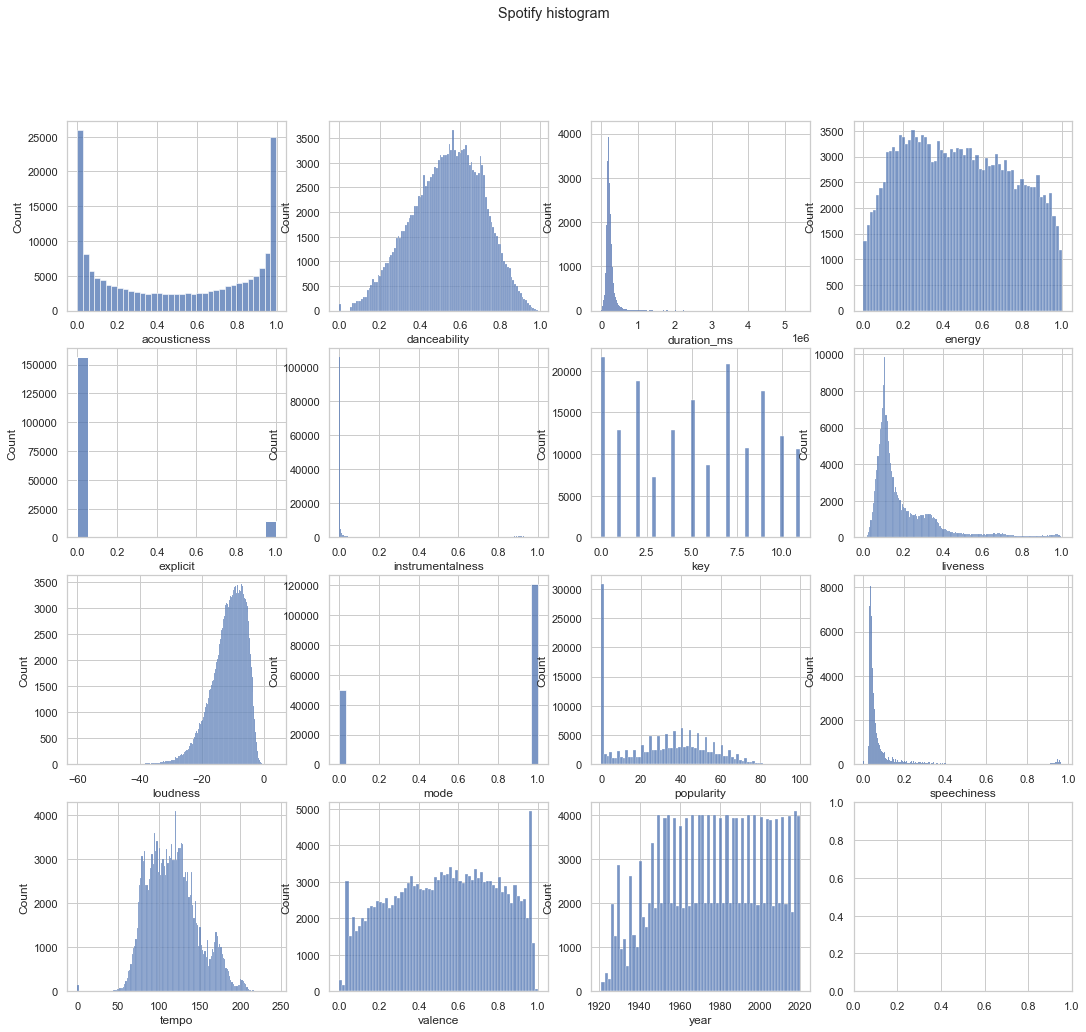

In [316]:
features_distrib('data.csv')

Popularity Distibution vs Density


C:\Users\porfi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


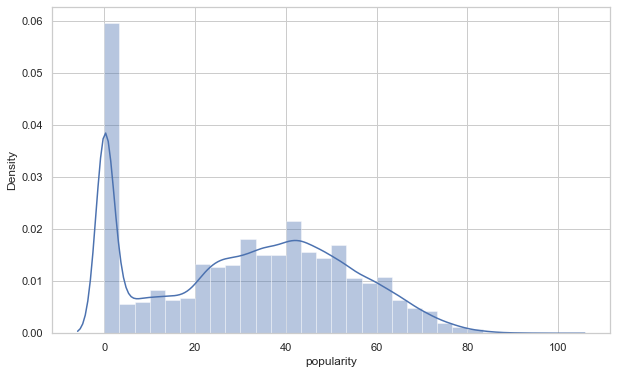

In [317]:
popularity_distrib("data.csv")

Feature Positioning Scatterplot


<Figure size 720x432 with 0 Axes>

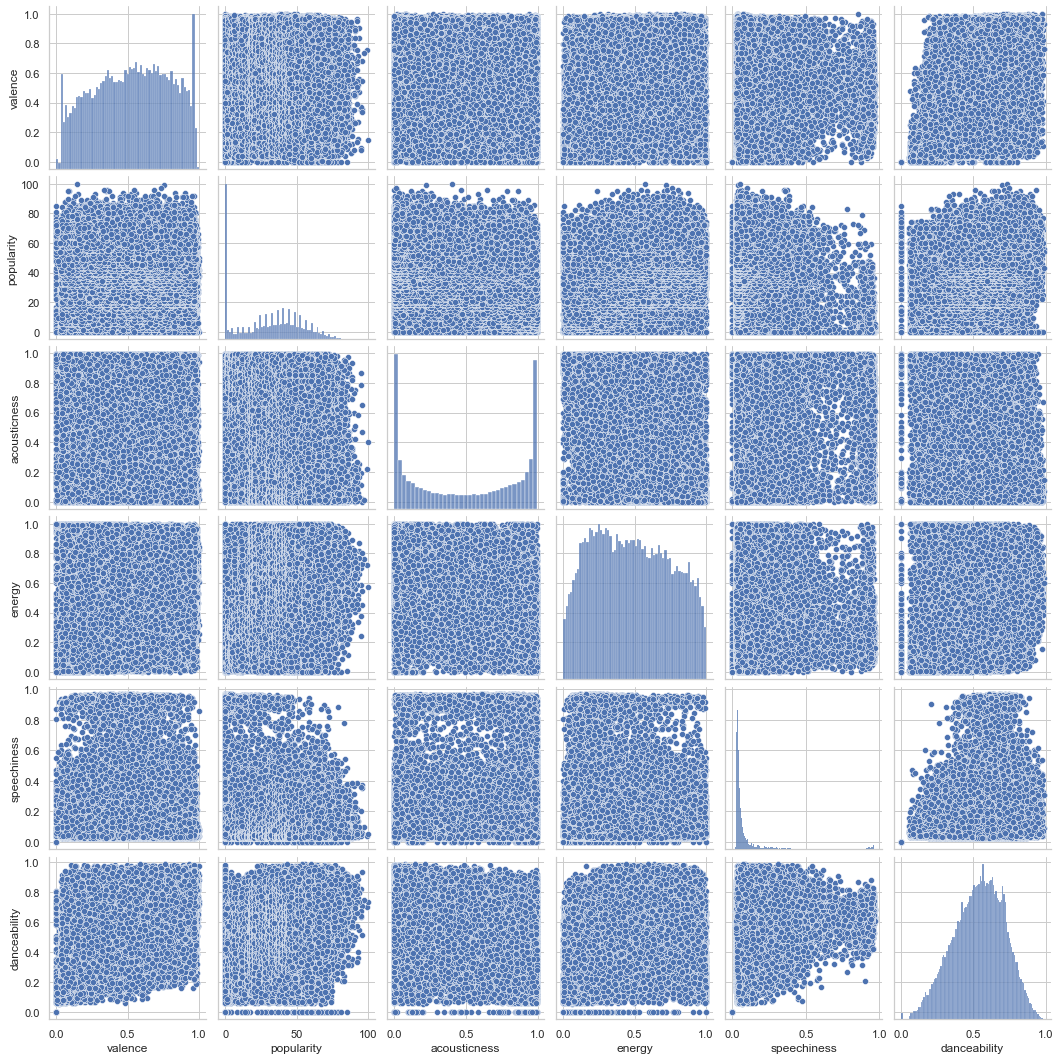

In [320]:
positioning_scatterplots('data.csv')

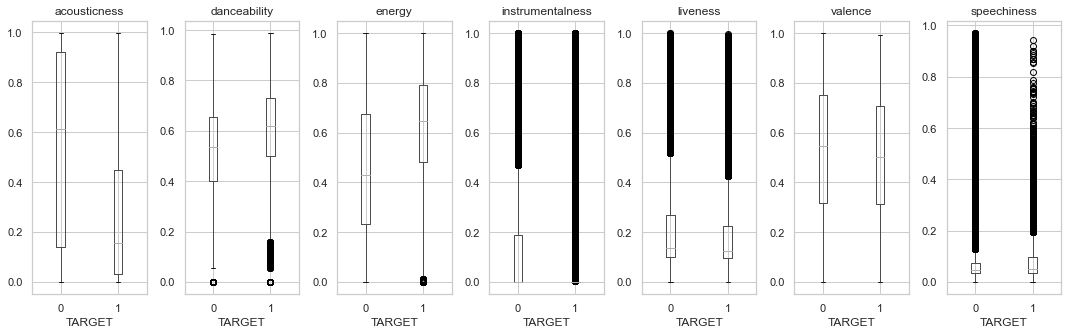

In [321]:
popularity_unpopularity('data.csv')

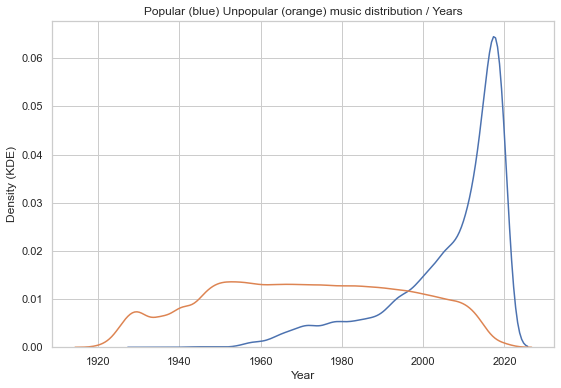

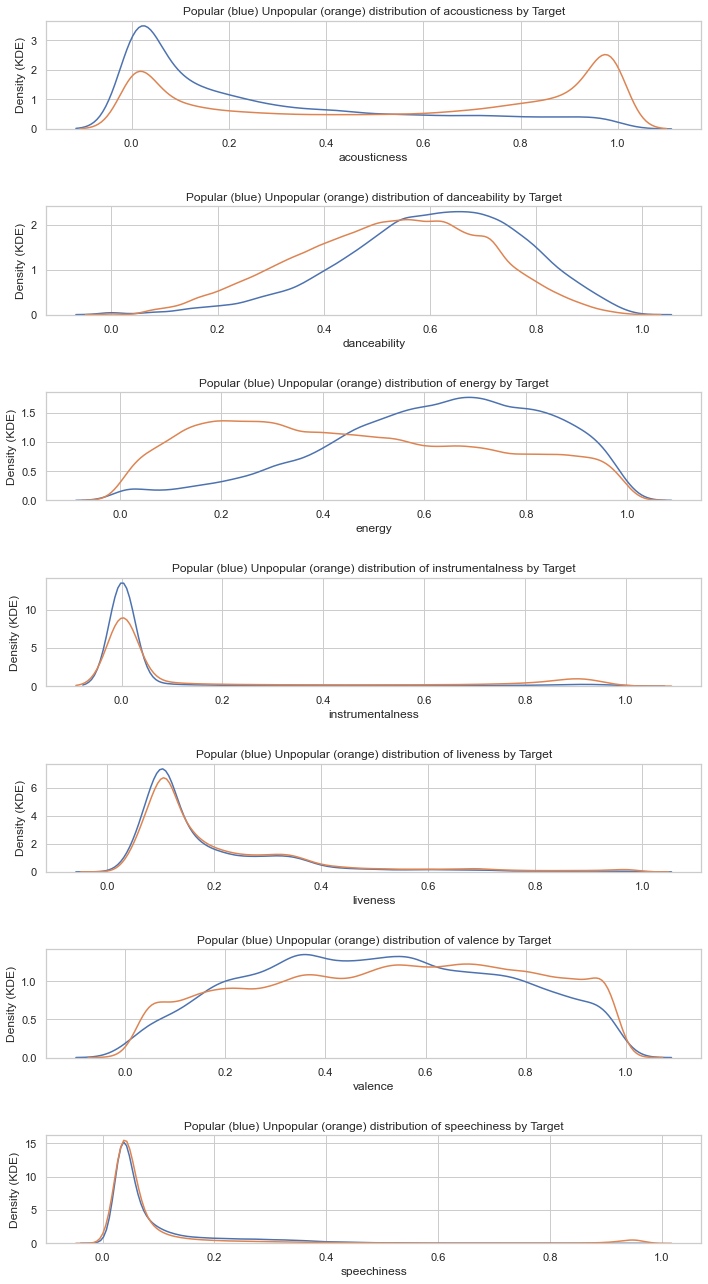

In [322]:
# use kernel density estimation plot (KDE) to visualize popularity (in this case we use 'target') and other features 
# https://en.wikipedia.org/wiki/Kernel_density_estimation

# density generally is even except some shifts in acousticness, danceability, energy which confirms our previous findings
popularity_KDE('data.csv')

Top 10 songs ranked by cumulative popularity


C:\Users\porfi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


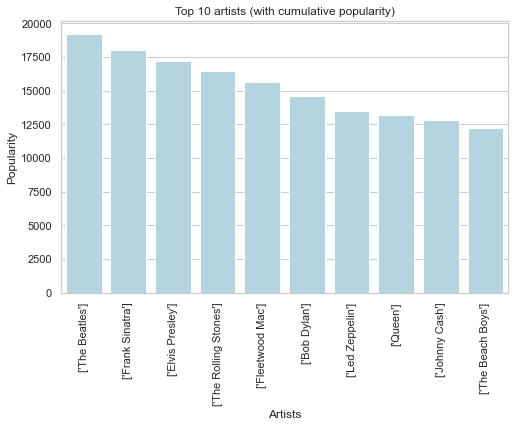

In [323]:
# let's look top 10 popular artist, in this case a sum (cumulative value) of popularity of their songs

# As we see, over the years the most popular artists are The Beatles, Frank Sinatra, Elvis Presley.
# Assuming that Fleetwood Mac was widely popular in 1970s, not recently
top_songs_cumm_popularity('data.csv')

Top 10 songs ranked by popularity


C:\Users\porfi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


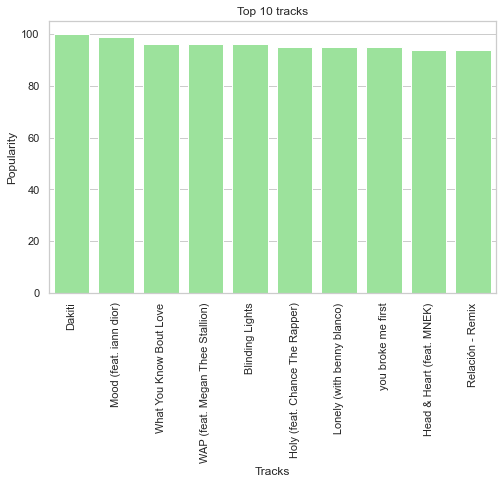

In [324]:
top_ten_popularity('data.csv')

# Recommendation System 
***Please run the next line to initiate/execute the recommendation system***

In [ ]:
execute_rec_system()